# Construindo um sistema de recomendação

Neste artigo iremos criar uma situação ficticia, onde seremos um engenheiro de ML que deve construir um sistema recomendação.

Vamos aproveitar e fazer um storytelling com nossos dados para aprimorar nossas habilidades analiticas durante o processo de análise de dados.

## Situação Fictícia:

Você é um engenheiro de Machine Learning em uma empresa de e-commerce. A empresa deseja aumentar as vendas recomendando produtos relevantes aos clientes. Eles já coletaram dados de transações anteriores, incluindo informações como:

- ID do cliente

- ID do produto

- Categoria do produto

- Data da compra

- Valor da compra

- Avaliação do cliente sobre o produto (de 1 a 5)


A tarefa é construir um sistema de recomendação para sugerir produtos aos clientes com base no histórico de compras e avaliações.

# Aplicando o Pensamento Analítico para uma Visão Estratégica no Desenvolvimento do Nosso Sistema de Recomendação

O pensamento analítico vai além de ser apenas uma metodologia; ele é uma forma de raciocinar e abordar problemas, independentemente da situação. Aplicar uma abordagem analítica de forma eficiente é crucial para alcançar os objetivos estabelecidos. Ter um pensamento analítico significa ser capaz de extrair informações valiosas tanto dos dados quanto da situação a ser resolvida, garantindo uma compreensão profunda e uma solução eficaz.

## Definição do Problema:
**Pergunta Principal:** Como podemos recomendar produtos relevantes aos clientes para aumentar as vendas?

**Subquestões:**
- Quais dados são mais relevantes para fazer recomendações?
- Qual algoritmo de recomendação seria mais adequado?

## Coleta de Dados:
- Revisar os dados disponíveis e identificar se há dados faltantes ou inconsistentes.
- Garantir que todos os dados necessários (ID do cliente, ID do produto, categoria, data da compra, valor e avaliação) estejam disponíveis.

## Análise Exploratória de Dados:
- Examinar a distribuição das avaliações dos produtos.
- Identificar padrões de compra, como produtos frequentemente comprados juntos.
- Verificar a correlação entre a categoria do produto e a avaliação média.

## Preparação dos Dados:
- Limpar os dados, removendo duplicatas e preenchendo valores ausentes.
- Normalizar os dados de avaliações para um formato consistente.
- Dividir os dados em conjuntos de treinamento e teste.

## Seleção do Modelo:
- Considerar diferentes algoritmos de recomendação, como Filtragem Colaborativa, Filtragem Baseada em Conteúdo e Modelos Híbridos.
- Testar os modelos utilizando validação cruzada e métricas como precisão, recall e F1-score.

## Treinamento e Avaliação do Modelo:
- Treinar o modelo escolhido com o conjunto de dados de treinamento.
- Avaliar o desempenho do modelo no conjunto de teste.
- Ajustar hiperparâmetros para melhorar o desempenho.

## Implementação e Monitoramento:
- Implementar o modelo de recomendação no sistema de e-commerce.
- Monitorar as recomendações em tempo real e coletar feedback dos clientes.
- Ajustar o modelo com base no feedback e em novos dados de transações.




# Geração dos Dados Fictícios

In [60]:
import numpy as np
import pandas as pd
import altair as alt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime, timedelta
import random

In [61]:
# Função para gerar datas aleatórias
def random_date(start, end):
  return start + timedelta(days=random.randint(0, int((end - start).days)))

In [62]:
# Gerar dados fictícios
num_records = 4809
user_ids = np.random.randint(1, 101, size=num_records)
item_ids = np.random.randint(1, 501, size=num_records)
categories = np.random.choice(['Eletrônicos', 'Roupas', 'Casa', 'Livros', 'Esportes', 'Beleza'], size=num_records)
purchase_dates = [random_date(datetime(2020, 1, 1), datetime(2024, 5, 31)) for _ in range(num_records)]
purchase_values = np.round(np.random.uniform(10, 500, size=num_records), 2)
ratings = np.random.randint(1, 6, size=num_records)

# Criar DataFrame
df = pd.DataFrame({
    'userID': user_ids,
    'itemID': item_ids,
    'category': categories,
    'purchaseDate': purchase_dates,
    'purchaseValue': purchase_values,
    'rating': ratings
})

# Introdução

Em nosso e-commerce, analisamos amostras de dados de compras recentes para entender melhor as preferências dos clientes e identificar padrões importantes que possam guiar nossas estratégias futuras.

# Exploração dos Dados

A tabela abaixo mostra uma amostra aleatória de 10 transações realizadas em nossa plataforma:

In [63]:
df.sample(10)

,userID,itemID,category,purchaseDate,purchaseValue,rating
4501,83,325,Esportes,2022-06-02,47.80,3
2900,68,107,Casa,2023-11-02,58.83,3
333,91,36,Eletrônicos,2023-11-09,391.91,2
4181,82,420,Eletrônicos,2023-06-07,245.85,4
3386,93,335,Beleza,2022-12-09,416.47,1
2303,39,5,Livros,2024-03-02,111.70,5
526,87,183,Livros,2020-01-15,382.16,2
1565,94,281,Beleza,2022-01-02,244.69,2
2053,80,9,Casa,2023-10-21,343.24,1
2702,41,264,Roupas,2020-07-30,248.02,5


# Distribuição por Categorias de Produto

Para entender melhor a distribuição das categorias, criamos um gráfico de barras que mostra a contagem de transações por categoria:

Ao analisar os dados históricos de transações, descobrimos que temos um total de 6 categorias principais de produtos: Eletrônicos, Roupas, Casa, Livros, Esportes e Beleza.

O gráfico abaixo mostra a distribuição da contagem de produtos por categoria:

In [64]:
# Contar o número de ocorrências de cada categoria e calcular a amplitude
count_category = df['category'].value_counts().reset_index()
count_category.columns = ['category', 'Count']
amplitude = count_category['Count'].max() - count_category['Count'].min()

# Criar o gráfico de barras usando Altair
chart = alt.Chart(count_category).mark_bar().encode(
    x=alt.X('category:N', title='Categoria do Produto', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('Count:Q', title='Contagem de Transações'),
    color=alt.Color('category:N', legend=alt.Legend(title=f'Amplitude: {amplitude}'))
).properties(
    title={'text': ['Distribuição de Contagem por Categoria de Produto'], 'subtitle': [f'O gráfico mostra a contagem de transações por categoria']},
    width=850,
    height=400
)

# Adicionar valores exatos de contagem sobre as barras
chart_text = chart.mark_text(
    align='center',
    baseline='bottom',
    dy=-5,
    size=14,
).encode(
    text='Count:Q'
)

# Combinar gráfico de barras com valores exatos e mostrar o gráfico final
final_chart = chart + chart_text
final_chart

/home/lucas/anaconda3/envs/Recomm_System/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.LayerChart(...)

## Insights Obtidos

- Roupas aparece como a categoria mais frequente em nossas transações, seguida por Casa e Beleza.

- Livros e Eletrônicos são as categorias menos populares, sugerindo uma oportunidade de crescimento ou estratégias específicas de marketing.

- Apesar disso, podemos observar que a diferença não é muito grande, tendo uma aplitude de 80 entre o maior e o menor número de transações por categoria.

# Análise Temporal das Vendas por Categoria

Vamos analisar a distribuição das vendas ao longo do tempo, com o objetivo de identificar quais categorias de produtos se destacaram em termos de volume de vendas.

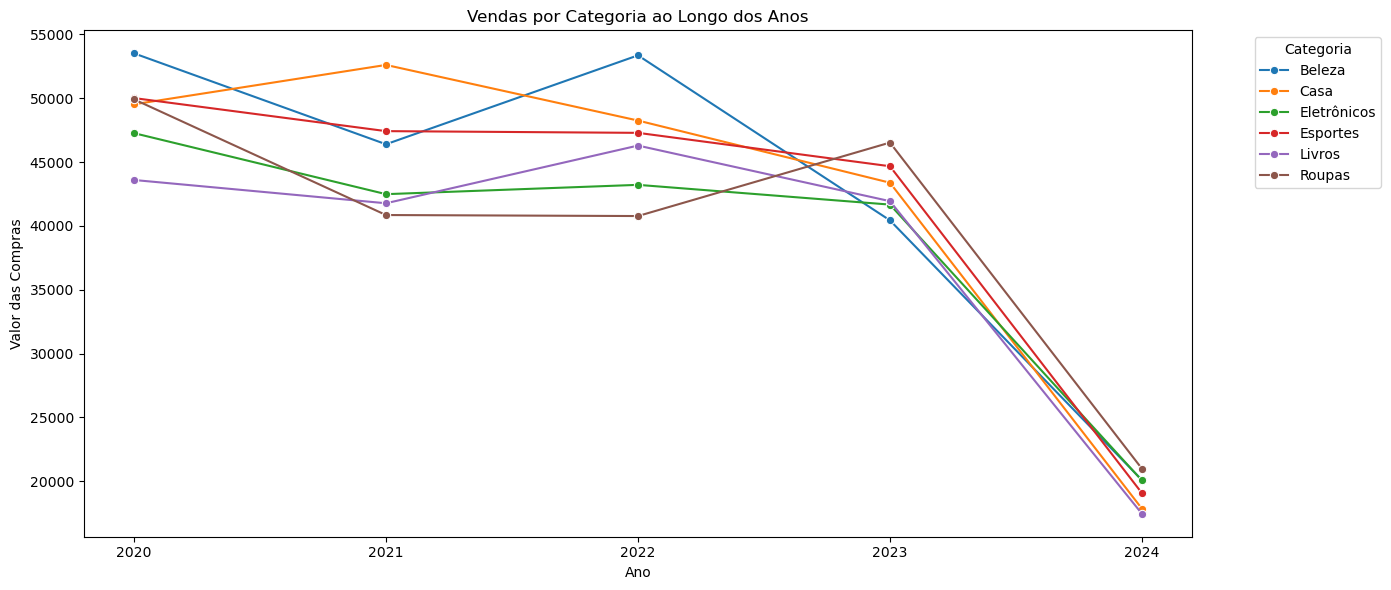

In [65]:
# Converter a coluna purchaseDate para tipo datetime
df['purchaseDate'] = pd.to_datetime(df['purchaseDate'])

# Extrair ano para facilitar a análise temporal
df['year'] = df['purchaseDate'].dt.to_period('Y').astype(str)

# Agrupar por categoria e ano, somando o valor das compras
category_sales = df.groupby(['category', 'year'])['purchaseValue'].sum().reset_index()

# Criar o gráfico de linhas usando matplotlib e seaborn
plt.figure(figsize=(14, 6))

sns.lineplot(data=category_sales, x='year', y='purchaseValue', hue='category', marker='o')

# Configurar título e rótulos dos eixos
plt.title('Vendas por Categoria ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Valor das Compras')

# Exibir a legenda fora da área do gráfico
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar o layout para garantir que a legenda seja visível
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## Análise dos Resultados

Por se tratar de dados fictícios gerados aleatóriamente, não obtivemos uma simulação real de como seria o compartamento de compra de clientes em épocas festivas ou feriados, que em uma situação com dados reais, poderia ser identificado um padrão e tendências em determinada épocas do ano.

Mas vamos nos ater ao que temos em mãos aqui e tentar fazer uma análise desses dados.

### Identificação de Tendências Sazonais

- Ao analisar o gráfico, podemos identificar tendências sazonais nas vendas. Podemos observarmos uma baixa nas vendas de produtos de Casa durante os primeiros meses dos ano.

### Comparação de Categorias

- O gráfico também permite comparar o desempenho das diferentes categorias ao longo do ano. Podemos identificar quais categorias tiveram um desempenho consistente, quais tiveram picos de vendas específicos e quais categorias podem necessitar de maior atenção ou estratégias de marketing para melhorar suas vendas.

### Insights para Estratégias de Marketing

- Com base nas tendências observadas, a equipe de marketing pode planejar campanhas específicas para períodos de alta demanda ou identificar oportunidades para promover categorias menos vendidas durante períodos de baixa.

# Estatísticas Descritivas

As estatísticas descritivas fornecem uma visão geral do comportamento dos valores de compra:

- Média (mean): O valor médio das compras.

- Mediana (median): O valor central das compras, que ajuda a entender o valor
típico gasto, especialmente se a distribuição estiver enviesada.

- Mínimo (min): O valor de compra mais baixo.

- Máximo (max): O valor de compra mais alto.

- Desvio Padrão (std): A medida da dispersão dos valores de compra.

- Medidas de Quartis:

In [66]:
# Calcular estatísticas descritivas
purchase_stats = df['purchaseValue'].describe()

# Calcular a mediana separadamente, pois não está incluída em describe()
purchase_median = df['purchaseValue'].median()

# Adicionar a mediana às estatísticas descritivas
purchase_stats['median'] = purchase_median

print(purchase_stats)

count     4809.000000
mean       253.417785
std        142.234465
min         10.330000
25%        127.700000
50%        254.660000
75%        377.320000
max        499.990000
median     254.660000
Name: purchaseValue, dtype: float64


In [67]:
# Histograma dos valores de compra
hist = alt.Chart(df).mark_bar().encode(
    alt.X('purchaseValue:Q', bin=alt.Bin(maxbins=20), title='Valor de Compra'),
    alt.Y('count()', title='Contagem'),
    tooltip=['purchaseValue', 'count()']
).properties(
    title='Distribuição dos Valores de Compra',
    width=600,
    height=400
)

# Boxplot dos valores de compra
boxplot = alt.Chart(df).mark_boxplot().encode(
    y=alt.Y('purchaseValue:Q', title='Valor de Compra'),
    tooltip=['purchaseValue']
).properties(
    title='Boxplot dos Valores de Compra',
    width=400,
    height=400
)

# Mostrar os gráficos lado a lado
final_chart = hist | boxplot

final_chart

/home/lucas/anaconda3/envs/Recomm_System/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/home/lucas/anaconda3/envs/Recomm_System/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.HConcatChart(...)

In [68]:
# Calcular estatísticas descritivas dos ratings
rating_stats = df['rating'].describe()

print(rating_stats)

count    4809.000000
mean        3.017675
std         1.421950
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64


In [69]:
# Histograma dos ratings
hist = alt.Chart(df).mark_bar().encode(
    alt.X('rating:O', title='Avaliação (Rating)'),
    alt.Y('count()', title='Contagem'),
    tooltip=['rating', 'count()']
).properties(
    title='Distribuição das Avaliações (Ratings)',
    width=400,
    height=400
)

# Boxplot dos ratings
boxplot = alt.Chart(df).mark_boxplot().encode(
    y=alt.Y('rating:Q', title='Avaliação (Rating)'),
    tooltip=['rating']
).properties(
    title='Boxplot das Avaliações (Ratings)',
    width=400,
    height=400
)

# Mostrar os gráficos lado a lado
final_chart = hist | boxplot

final_chart

/home/lucas/anaconda3/envs/Recomm_System/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/home/lucas/anaconda3/envs/Recomm_System/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.HConcatChart(...)

In [75]:
# Gráfico de dispersão com Altair
scatter_plot = alt.Chart(df).mark_circle(size=60).encode(
    x=alt.X('purchaseValue:Q', title='Valor da Compra'),
    y=alt.Y('rating:Q', title='Avaliação'),
    color=alt.Color('category:N', title='Categoria'),
    tooltip=['purchaseValue', 'rating', 'category']
).properties(
    title='Relação entre Valor de Compra, Avaliação e Categoria'
).interactive()

scatter_plot

/home/lucas/anaconda3/envs/Recomm_System/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/home/lucas/anaconda3/envs/Recomm_System/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)

In [71]:
# Matriz de correlação usando Pandas
correlation_matrix = df[['purchaseValue', 'rating']].corr()

print('Matriz de Correlação:')
print(correlation_matrix)

Matriz de Correlação:
               purchaseValue    rating
purchaseValue       1.000000 -0.004836
rating             -0.004836  1.000000
